# Homework 4 - Question 4 - Luke Arend

In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# (a)

Write a function `samples = ndRandn(mean, cov, num)` that generates a set of samples drawn from an N-dimensional Gaussian distribution with the specified mean (an
$N$-vector) and covariance (an $N$x$N$ matrix). The parameter num should be optional
(defaulting to 1) and should specify the number of samples to return. The returned
value should be a matrix with num rows each containing a sample of $N$ elements. (Hint:
use the MATLAB function `randn` to generate samples from an $N$-dimensional Gaussian with zero mean and identity covariance matrix $X$, and then transform these to
achieve the desired mean and covariance. Recall that the covariance of $Y = MX$ is
$E(Y Y^T) = M C_X M^T$ where $C_X$ is the covariance of $X$.)

We want a function which yields samples from a normal random variable with mean $\mu$ and covariance $C_Y$. For this we start with a normal random variable X with $\mu$ = 0 and $C_X$ = $I$ (identity matrix). We seek a matrix $M$ with which we can transform $X$ to get $Y$.

$X = M^{-1} Y$.

$C_Y = M M^T$.

Let $C_Y$ have singular value decomposition $U S V^T = C_Y$.

Then $U S V^T = M M^T$.

Since $C_Y$ is symmetric, $U = V$ in its singular value decomposition, so $U S U^T = M M^T$.

We can freely decompose S into a product of two diagonal matrices each containing the square roots of the values in $S$: $S = \Lambda \Lambda^T$ where $\Lambda = \sqrt{S}$.

Then we can write $U S U^T = U \Lambda \Lambda^T U^T = U \Lambda (U \Lambda)^T = M M^T$. So $M = U \Lambda = U \sqrt{S}$.

The transform $Y = M X$, with $M = U \sqrt{S}$ (from $U S V^T = C_Y$) and $X$ drawn from the standard normal, is implemented below.

In [2]:
def nd_randn(mean, cov, num=1):
    ndims = len(mean)
    X = np.random.randn(num, ndims)
    U, s, Vt = np.linalg.svd(cov)
    M = U @ np.diag(np.sqrt(s))
    X = np.random.randn(1000, 2)
    Y = (M @ X.T).T
    Y += mean
    return Y

For this, use mean $µ = [4, 5]$
with $C_Y = [10, −4; −4, 5]$ to sample and scatterplot 1,000 points to verify your function
worked as intended.

In [3]:
mean = np.array([4, 5])
cov = np.array([[10, -4], [-4, 5]])
Y = nd_randn(mean, cov, num=1000)

In [5]:
mean_Y = np.mean(Y, axis=0)
cov_Y = np.cov(Y.T)
mean_Y, cov_Y

(array([4.16000145, 4.8989835 ]),
 array([[ 9.23192352, -3.57934043],
        [-3.57934043,  4.78936171]]))

The mean and covariance of our sampled $Y$ are close to the requested mean and covariance $[4, 5]$ and $[[10, -4], [-4, 5]]$). So `nd_randn` worked as expected.

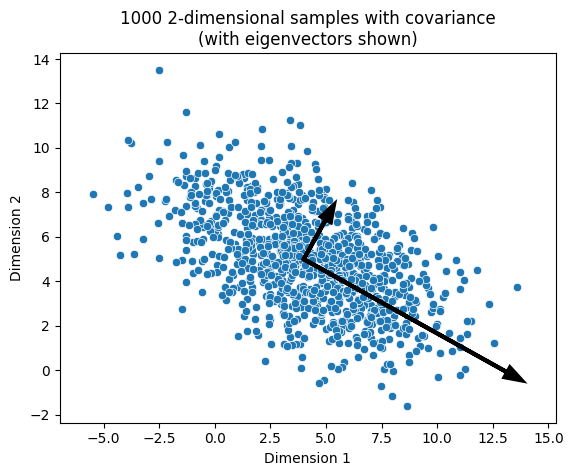

In [7]:
sns.scatterplot(x=Y[:, 0], y=Y[:, 1])
(v1, v2), E = np.linalg.eig(np.cov(Y.T))
x1, x2 = E.T
plt.arrow(mean[0], mean[1], v1 * x1[0], v1 * x1[1], color='k',
          linewidth=3, head_width=0.5, length_includes_head=True)
plt.arrow(mean[0], mean[1], v2 * x2[0], v2 * x2[1], color='k',
          linewidth=3, head_width=0.5, length_includes_head=True)
plt.title('1000 2-dimensional samples with covariance\n(with eigenvectors shown)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.axis('equal')
plt.show()

# (b)

Now consider the marginal distribution of a generalized 2-D Gaussian with mean $µ$ and
covariance $C$ in which samples are projected onto a unit vector $\hat{u}$ to obtain a 1-D distribution. Write a mathematical expression for the mean and variance of this marginal
distribution as a function of $\hat{u}$.

Let $y$ be the marginal distribution that results from projecting a 2D gaussian $\vec{x} \sim \mathcal{N}(\mu, C)$ onto a unit vector $\hat{u}$.

$y = \hat{u}^\intercal \vec{x}$, so the mean of $y$ is

$\mu_y = \mathbb{E}[y] = \mathbb{E}[\hat{u}^\intercal \vec{x}] = \hat{u}^\intercal \mathbb{E}[\vec{x}] = \hat{u}^\intercal \vec\mu$.

The variance of $y$ is

$\sigma_y^2
= \mathbb{E}[(y - \mu_y)^2]
= \mathbb{E}[(\hat{u}^\intercal \vec{x} - \hat{u}^\intercal \cdot \vec\mu)^2]
= \mathbb{E}[(\hat{u}^\intercal (\vec{x} - \vec\mu))^2]
= \mathbb{E}[(\hat{u}^\intercal (\vec{x} - \vec\mu)) ((\vec{x} - \vec\mu)^\intercal \hat{u})]
= \hat{u}^\intercal \mathbb{E}[(\vec{x} - \vec\mu) (\vec{x} - \vec\mu)^\intercal] \hat{u}
= \hat{u}^\intercal C \hat{u}$.

In [35]:
def math_marginal_meanvar(mu, C, u):
    return u @ mu, u @ C @ u

def sample_marginal_meanvar(X, u):
    Y = X @ u
    return np.mean(Y), np.var(Y)

Check it for a set of 48 unit vectors spaced evenly 
around the unit circle. For each of these, compare the mean and variance predicted from
your mathematical expression to the sample mean and variance estimated by projecting
your 1,000 samples from part (a) onto $\hat{u}$.

In [44]:
t = 2 * np.pi * np.arange(48) / 48
vecs = np.array([np.cos(t), np.sin(t)]).T

In [49]:
math_means = []
math_vars = []
sample_means = []
sample_vars = []
for v in vecs:
    mean1, var1 = math_marginal_meanvar(mean, cov, v)
    mean2, var2 = sample_marginal_meanvar(Y, v)
    math_means.append(mean1)
    math_vars.append(var1)
    sample_means.append(mean2)
    sample_vars.append(var2)

Stem plot the mathematically computed mean
and the sample mean (on the same plot), and also plot the mathematical variance and
the sample variance, both plotted as a function of the orientation of $\hat{u}$ (relative to the
$x$-axis).

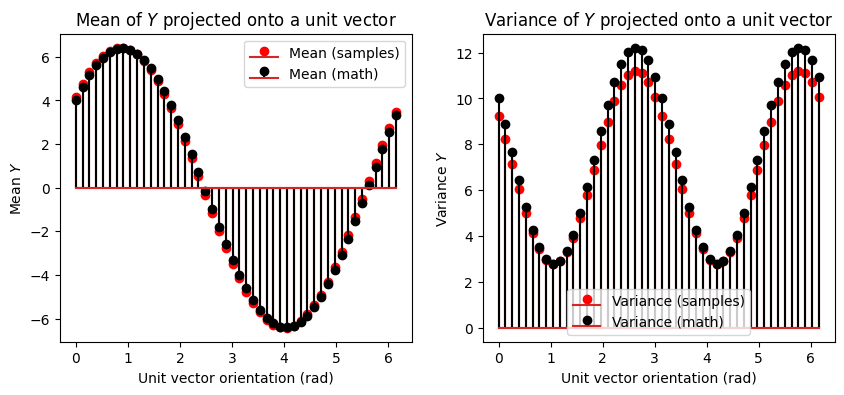

In [75]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plt.sca(axs[0])
plt.title('Mean of $Y$ projected onto a unit vector')
plt.stem(t, sample_means, 'r', label='Mean (samples)')
plt.stem(t, math_means, 'k', label='Mean (math)')
plt.legend()
plt.ylabel('Mean $Y$')
plt.xlabel('Unit vector orientation (rad)')

plt.sca(axs[1])
plt.title('Variance of $Y$ projected onto a unit vector')
plt.stem(t, sample_vars, 'r', label='Variance (samples)')
plt.stem(t, math_vars, 'k', label='Variance (math)')
plt.legend()
plt.ylabel('Variance $Y$')
plt.xlabel('Unit vector orientation (rad)')
plt.show()

# (c)

Now scatterplot 1,000 new samples of a 2-dimensional Gaussian using the same $µ$ and $C_Y$
from part (a).

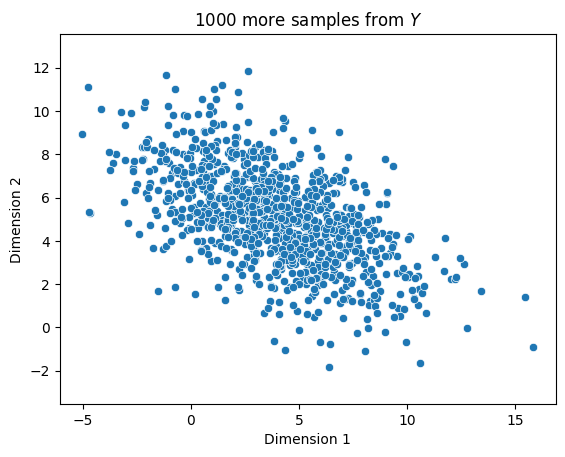

In [96]:
Y = nd_randn(mean, cov, num=1000)
sns.scatterplot(x=Y[:, 0], y=Y[:, 1])
plt.title('1000 more samples from $Y$')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.axis('equal')
plt.show()

Measure the sample mean and covariance of your data points, comparing
to the values that you requested when calling the function. 

In [97]:
sample_mean = np.mean(Y, axis=0)
sample_mean - mean

array([-0.17877335,  0.06430002])

In [98]:
sample_cov = np.cov(Y.T)
sample_cov - cov

array([[ 0.08904616,  0.06219317],
       [ 0.06219317, -0.15660276]])

For each of the unit vectors
from (b), find the two points on the line through the sample mean in the direction of
that unit vector for which the Mahalanobis distance from the mean (i.e., the negative
of the exponent of the Gaussian density) is equal to one. **incomplete**

Plot a closed contour that
connects all those points. Plot a second closed contour using the values of the mean and
covariance you used to generate your sample. Try this on three additional random data
sets with different means and covariance matrices. Does this contour capture the shape
of the data? **incomplete**

How would you, mathematically, compute the direction (unit vector) that maximizes
the variance of the marginal distribution?

Find the $\hat{u}$ that maximizes $\hat{u}^\intercal C \hat{u}$, using SVD and the optimization methods we learned in class.

How would you compute the direction that
maximizes the distance corresponding to Mahalanobis distance equal to one?

Find the eigenvectors of the covariance matrix (principle component vectors). These will decompose the Gaussian into orthogonal directions of greatest spread. The Mahalanobis distance will be maximized in the direction of the first principle component (the one with the largest singular value).

Compute these directions and verify that they are consistent with your plot. **incomplete**